# Start

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BlackFriday.csv")

## Dataset WalkThrough

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df[df["Product_Category_2"].isnull()].isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            166986
Purchase                           0
dtype: int64

In [7]:
# for all null Product_Category_2 , Product_Category_3 is also null . Other than that 2,06,403 more Product_Category_3 are null

In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [12]:
df.shape

(537577, 12)

In [13]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [14]:
#Since there are so many null values in Product_Category_3 a better approach will be to delete the entire column.
del df["Product_Category_3"]
del df["Product_Category_2"]


In [15]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [16]:
df.rename(columns={"Product_Category_1":"Product_Category"},inplace=True)

In [17]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


## Analysing Columns

In [19]:
#Number of unique users
df["User_ID"].nunique()

5891

In [20]:
df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [21]:
#Number of unique Products
df["Product_ID"].nunique()

3623

In [22]:
df["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [23]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [24]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [26]:
df["Occupation"].nunique()

21

In [27]:
#Occupations are number coded
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [28]:
# How long a person stays in a city
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [30]:
df["Marital_Status"].unique()

array([0, 1])

In [31]:
df["Product_Category"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [32]:
avg_purchase = (df["Purchase"].sum()/df["Purchase"].count()).round(2)

In [33]:
avg_purchase

9333.86

## Analysing Genders

In [35]:
df["Gender"].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

In [36]:
#or
df.groupby("Gender").count().iloc[:,0]

Gender
F    132197
M    405380
Name: User_ID, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

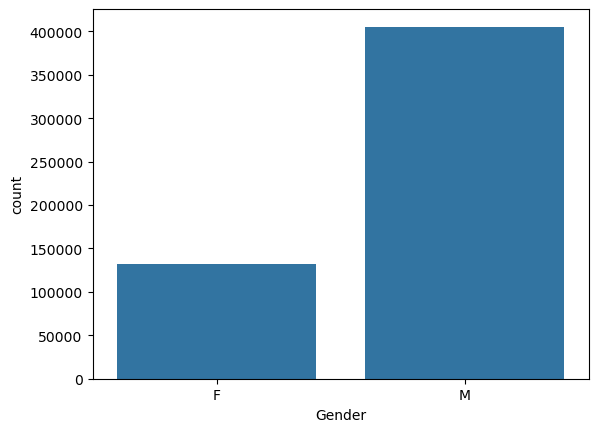

In [37]:
sns.countplot(data=df,x="Gender")

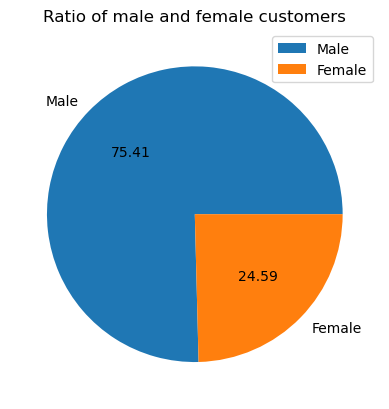

<Figure size 1000x1000 with 0 Axes>

In [38]:
plt.pie(x=df["Gender"].value_counts(),autopct="%.2f",normalize=True,labels=["Male","Female"])
plt.legend()
plt.title("Ratio of male and female customers")
plt.figure(figsize = (10,10))
plt.show()

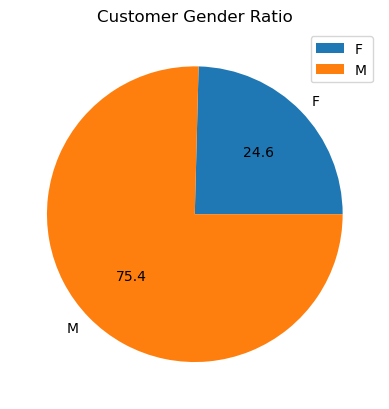

In [39]:
#Another approach
df.groupby("Gender").size().plot(kind="pie",autopct="%0.1f",title="Customer Gender Ratio")
plt.legend()
plt.show()

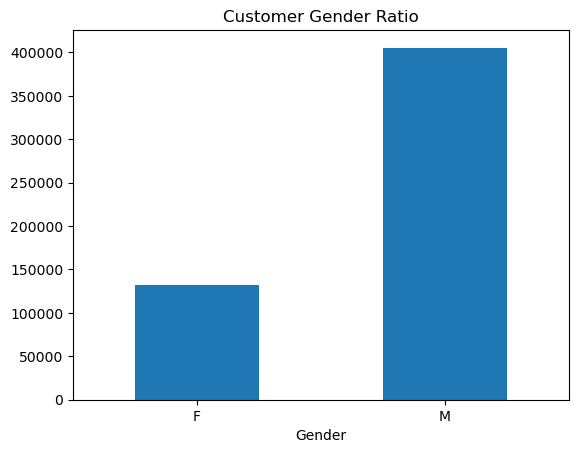

In [40]:
#Another curve
df.groupby("Gender").size().plot(kind="bar",title="Customer Gender Ratio")
plt.xticks(rotation=360)
plt.show()

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

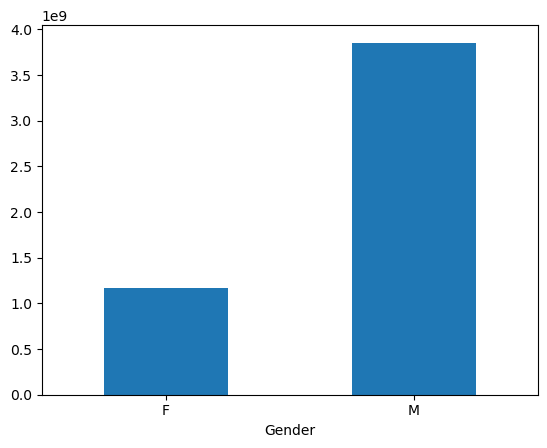

In [41]:
#Total purchase amount gender wise
df.groupby("Gender")["Purchase"].sum().plot(kind="bar")
plt.xticks(rotation=360)

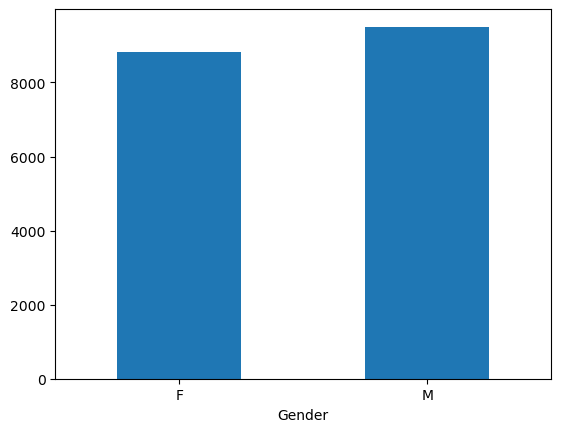

In [42]:
#Average mean purchase amount gender wise
df.groupby("Gender")["Purchase"].mean().plot(kind="bar")
plt.xticks(rotation=360)
plt.show()

## Analysing Age and Marital Status

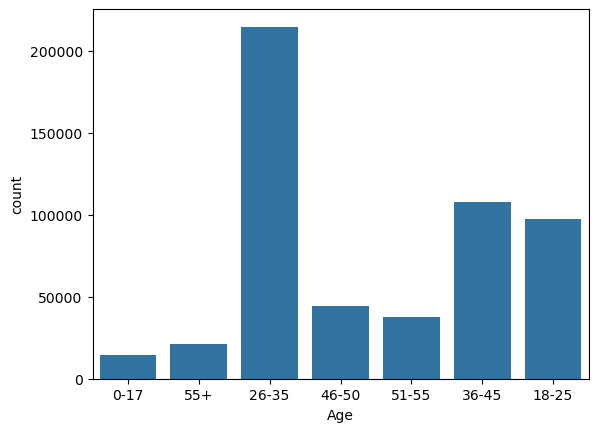

In [44]:
#Number of purchases made Age wise
sns.countplot(data=df,x='Age')
plt.show()

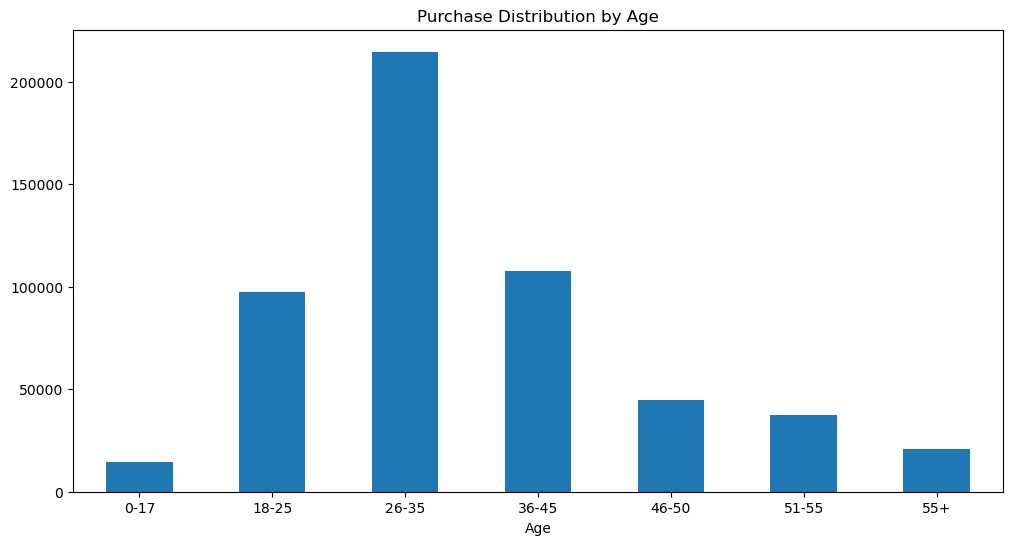

In [45]:
#Another approach
df.groupby("Age").size().plot(kind = "bar",figsize = (12,6),title="Purchase Distribution by Age")
plt.xticks(rotation=360)
plt.show()

In [46]:
#No Duplicates Present
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


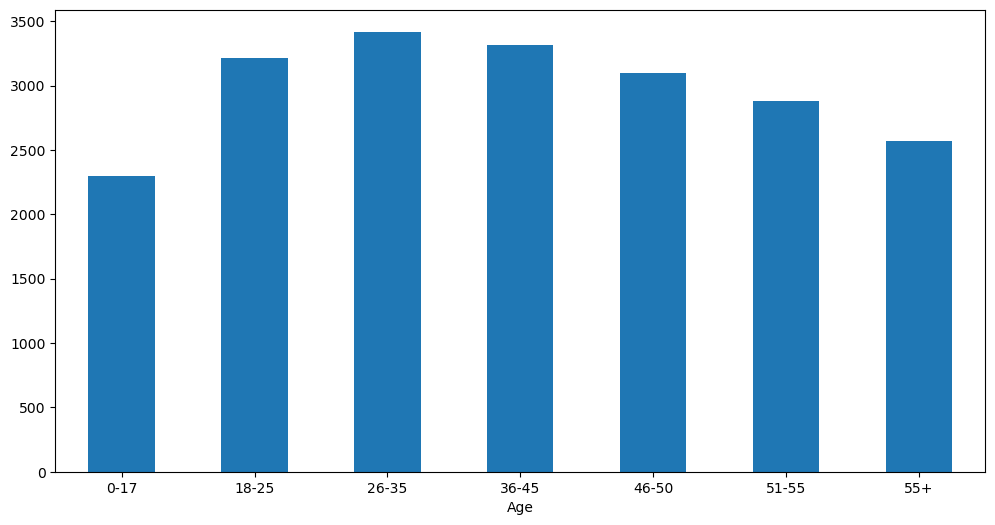

In [47]:
#number of unique products for each age group
df.groupby("Age")["Product_ID"].nunique().plot(kind="bar",figsize = (12,6))
plt.xticks(rotation=360)
plt.show()

In [48]:
#Storing in form of dataFrame
data_prod_id_age_wise = pd.DataFrame(df.groupby("Age")["Product_ID"].nunique())

In [49]:
data_prod_id_age_wise

,Product_ID
Age,
0-17,2300
18-25,3213
26-35,3419
36-45,3318
46-50,3099
51-55,2877
55+,2573


<Axes: ylabel='Purchase'>

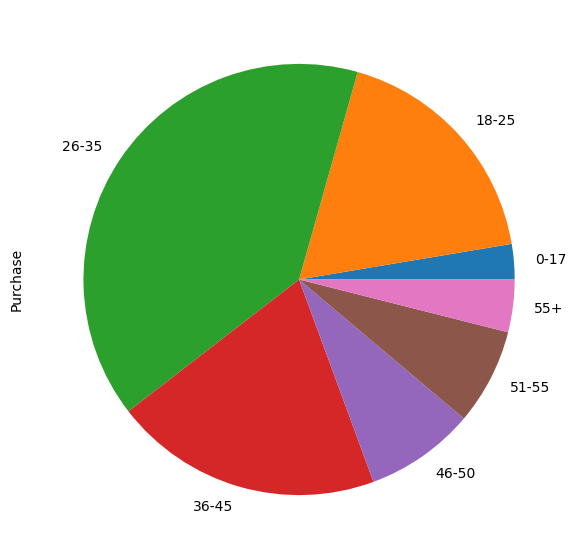

In [50]:
#Amount spend distribution by age
data_purchase_age_wise = df.groupby("Age")["Purchase"].sum()
data_purchase_age_wise.plot(kind="pie",figsize=(7,7))

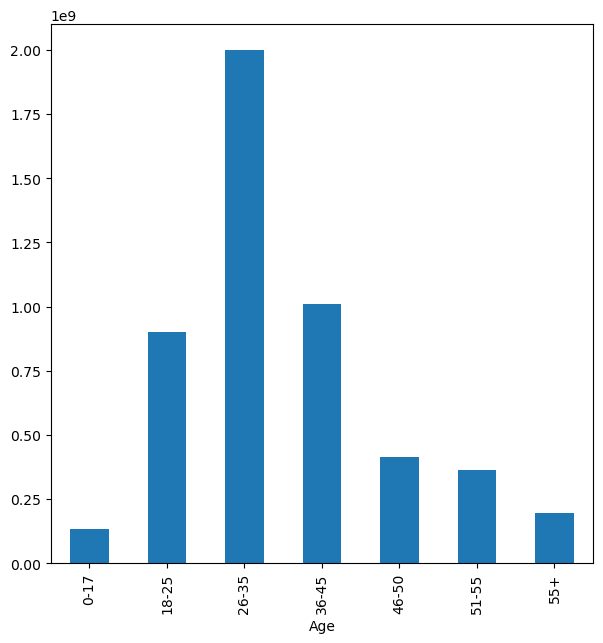

In [51]:
data_purchase_age_wise.plot(kind="bar",figsize=(7,7))
plt.show()

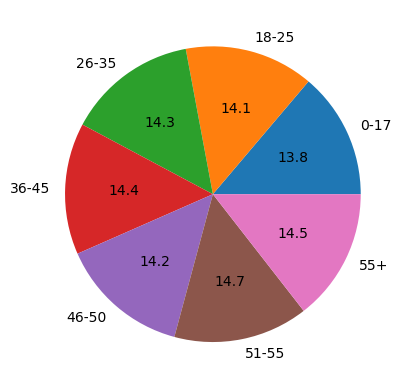

In [52]:
df_mean_purchase_age_wise = pd.DataFrame(df.groupby("Age")["Purchase"].mean().round(2))
plt.pie(df_mean_purchase_age_wise["Purchase"],labels = np.array(df_mean_purchase_age_wise.index),autopct = "%0.1f")
plt.show()

In [53]:
df_mean_purchase_age_wise

,Purchase
Age,
0-17,9020.13
18-25,9235.20
26-35,9314.59
36-45,9401.48
46-50,9284.87
51-55,9620.62
55+,9453.90


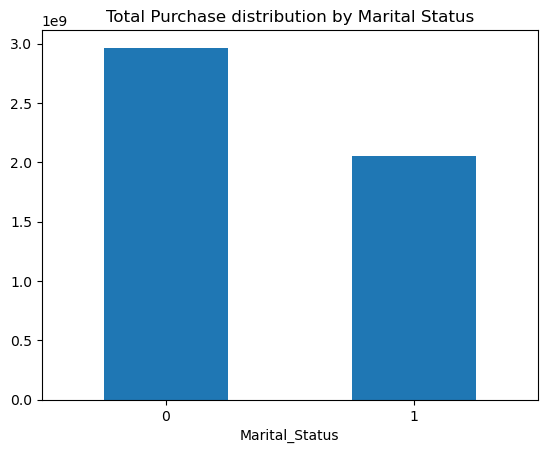

In [54]:
#Analysing Marital Status based results
df.groupby("Marital_Status")["Purchase"].sum().plot(kind="bar",title="Total Purchase distribution by Marital Status")
plt.xticks(rotation=360)
plt.show()

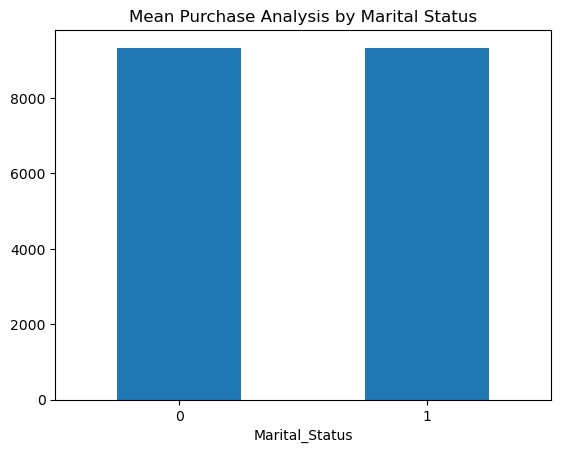

In [55]:
df.groupby("Marital_Status")["Purchase"].mean().plot(kind="bar",title="Mean Purchase Analysis by Marital Status")
plt.xticks(rotation=360)
plt.show()
#Almost same values : Marital Status doesn't effect Average Purchase amount 

In [56]:
df[df["Gender"]=='M'].groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9518.540223
1    9484.617891
Name: Purchase, dtype: float64

In [57]:
df[df["Gender"]=='F'].groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    8753.809299
1    8887.751553
Name: Purchase, dtype: float64

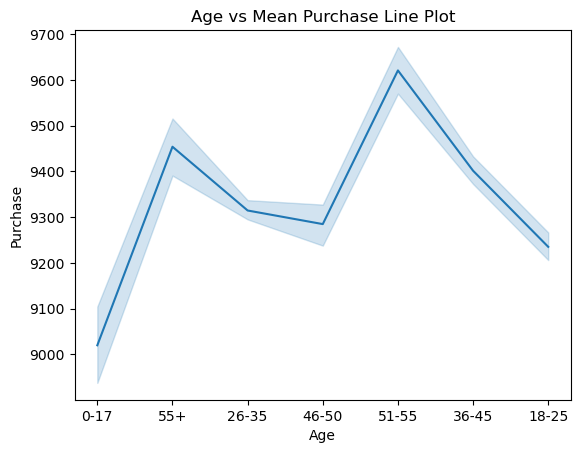

In [58]:
sns.lineplot(data=df,x="Age",y="Purchase")
plt.title("Age vs Mean Purchase Line Plot")
plt.show()

## Multi Variable/Column Analysis

In [60]:
for i in df["Age"].unique():
    df_i = df[df["Age"]==i]
    print(i,"\n","Male:",df_i["Gender"].value_counts()[0],"\n","Female :",df_i["Gender"].value_counts()[1])

0-17 
 Male: 9754 
 Female : 4953
55+ 
 Male: 15974 
 Female : 4929
26-35 
 Male: 165342 
 Female : 49348
46-50 
 Male: 31670 
 Female : 12856
51-55 
 Male: 27984 
 Female : 9634
36-45 
 Male: 81079 
 Female : 26420
18-25 
 Male: 73577 
 Female : 24057


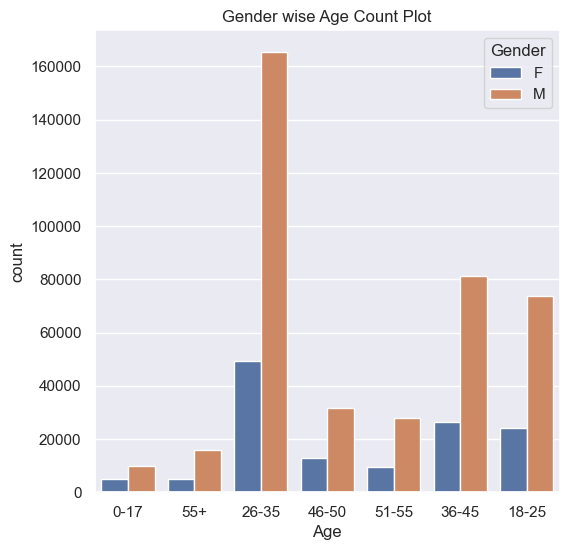

In [132]:
sns.countplot(data=df,x="Age",hue="Gender")
plt.title("Gender wise Age Count Plot")
plt.show()

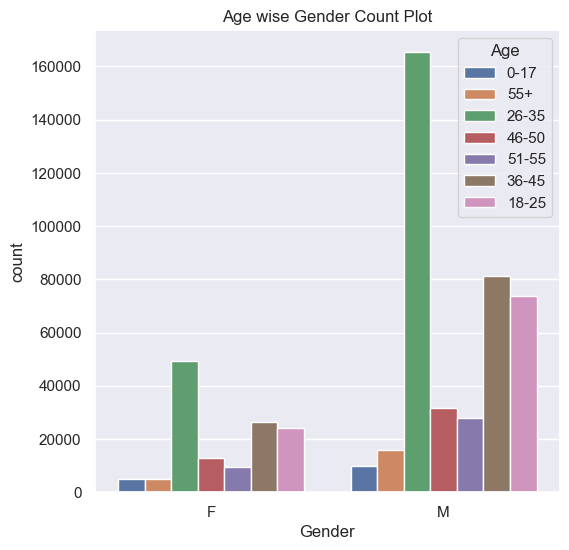

In [134]:
sns.set(rc={"figure.figsize" : (6,6)})
sns.countplot(data=df,x="Gender",hue="Age")
plt.title("Age wise Gender Count Plot")
plt.show()

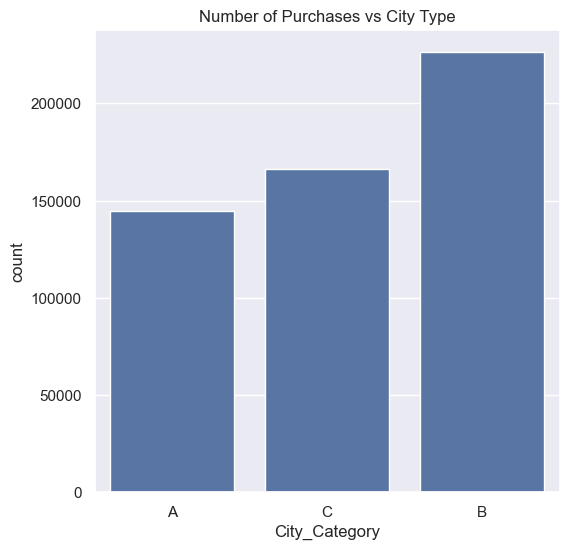

In [136]:
sns.countplot(x=df["City_Category"])
plt.title("Number of Purchases vs City Type")
plt.show()

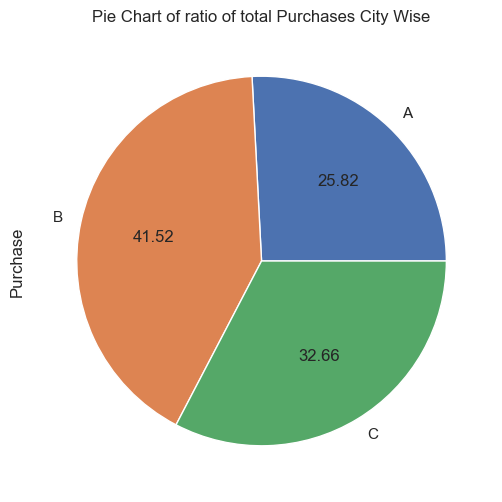

In [138]:
df.groupby("City_Category")["Purchase"].sum().plot(kind="pie",autopct="%.2f")
plt.title("Pie Chart of ratio of total Purchases City Wise")
plt.show()

In [65]:
data_mean_purchase_city_wise = pd.DataFrame(df.groupby("City_Category")["Purchase"].mean())

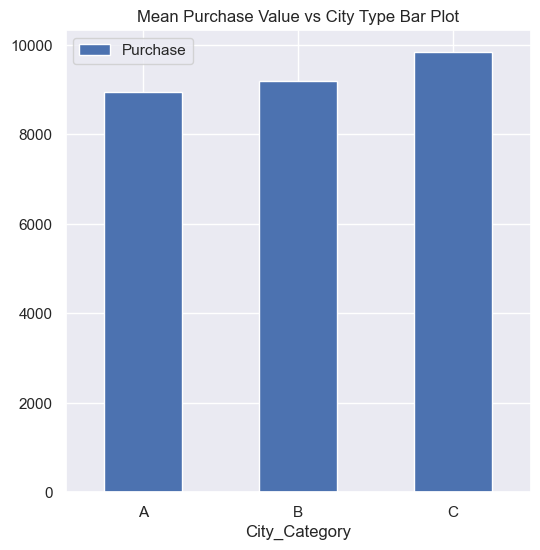

In [142]:
data_mean_purchase_city_wise.plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Mean Purchase Value vs City Type Bar Plot")
plt.show()

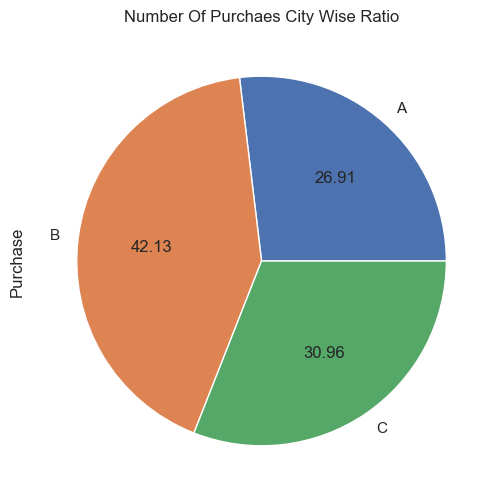

In [144]:
df.groupby("City_Category")["Purchase"].size().plot(kind="pie",autopct="%.2f")
plt.title("Number Of Purchaes City Wise Ratio")
plt.show()

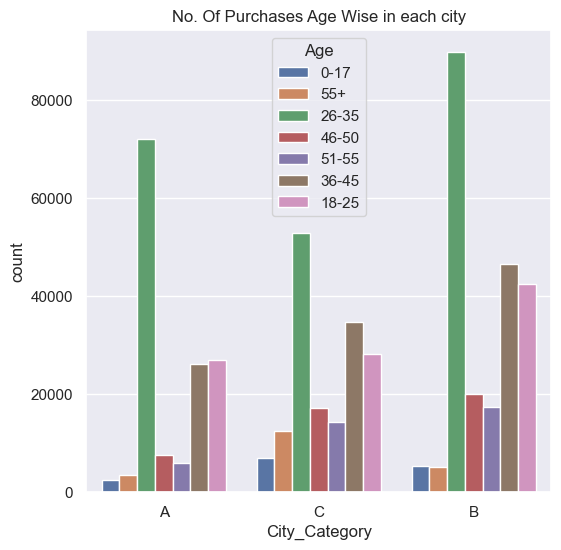

In [154]:
sns.countplot(x=df["City_Category"],hue="Age",data=df)
plt.title("No. Of Purchases Age Wise in each city")
plt.show()

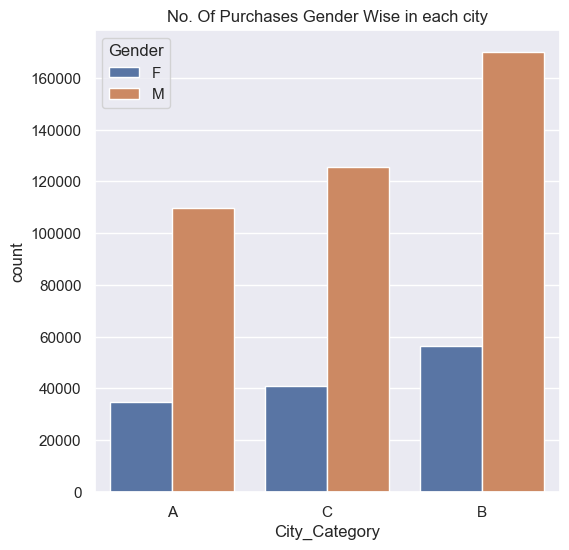

In [156]:
sns.countplot(x=df["City_Category"],hue="Gender",data=df)
plt.title("No. Of Purchases Gender Wise in each city")
plt.show()

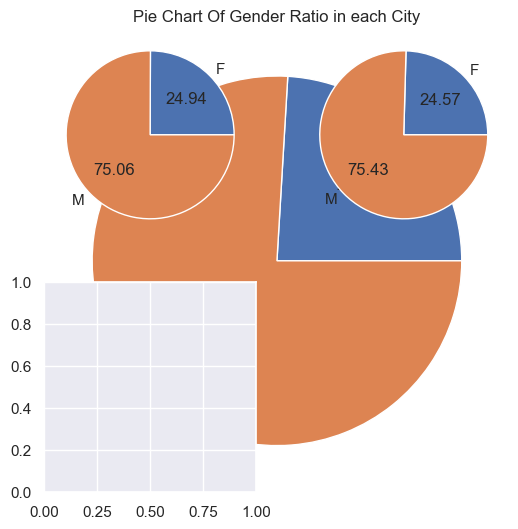

In [188]:
#Number of married customers in City A
df[df["City_Category"]=="A"].groupby("Gender").size().plot(kind="pie",autopct="%0.2f")
plt.title("Pie Chart Of Gender Ratio in each City")
plt.subplot(2,2,1)
df[df["City_Category"]=="B"].groupby("Gender").size().plot(kind="pie",autopct="%0.2f")
plt.subplot(2,2,2)
df[df["City_Category"]=="C"].groupby("Gender").size().plot(kind="pie",autopct="%0.2f")
plt.subplot(2,2,3)
plt.show()

## Occupation and Product Analysis

In [191]:
df["Occupation"].nunique()

21

In [193]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

<Axes: xlabel='Occupation', ylabel='count'>

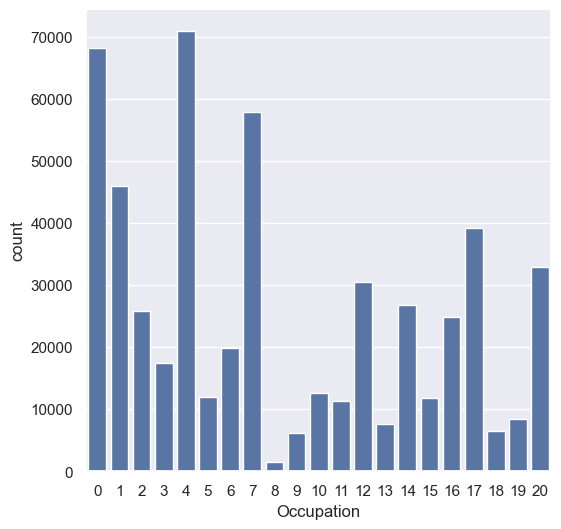

In [197]:
sns.countplot(data=df,x="Occupation")

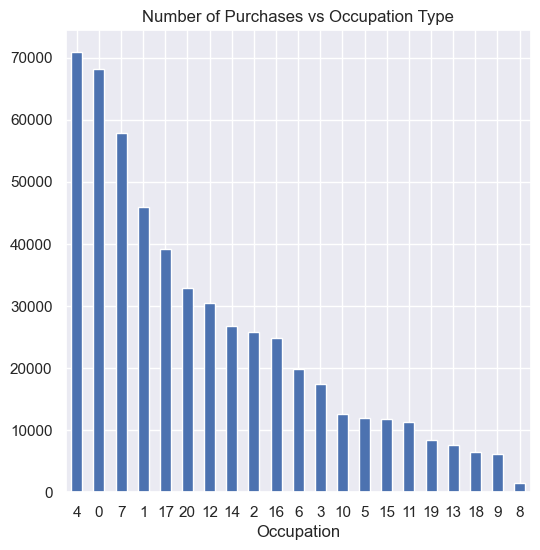

In [209]:
df.groupby("Occupation")["Purchase"].size().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Number of Purchases vs Occupation Type")
plt.show()

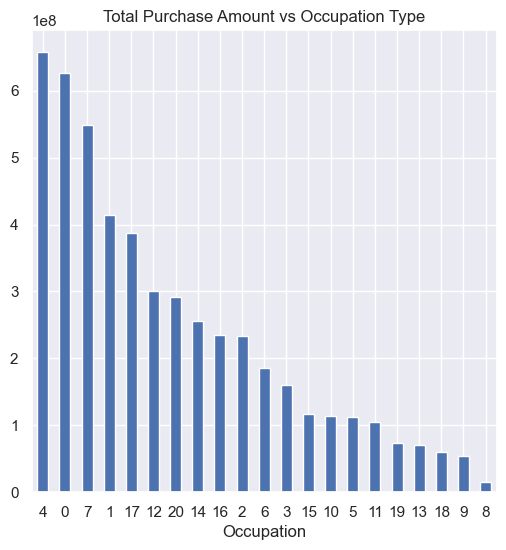

In [213]:
df.groupby("Occupation")["Purchase"].sum().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Total Purchase Amount vs Occupation Type")
plt.show()

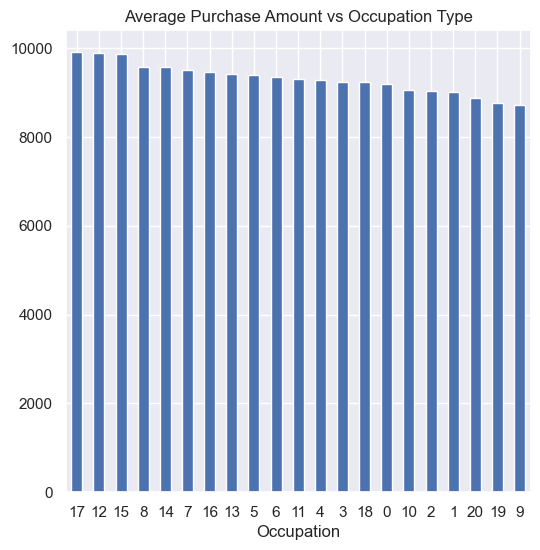

In [219]:
df.groupby("Occupation")["Purchase"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Average Purchase Amount vs Occupation Type")
plt.show()

In [221]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


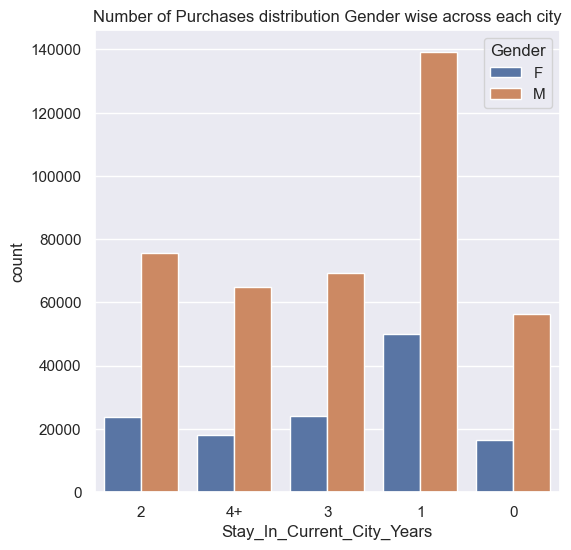

In [243]:
sns.countplot(data=df,x=df["Stay_In_Current_City_Years"],hue="Gender")
plt.title("Number of Purchases distribution Gender wise in Number Of Years Stayed")
plt.show()

In [235]:
#Inference :
#People who have stayed in city for 1 year make more number of purchases
#Females make more frequent purchases

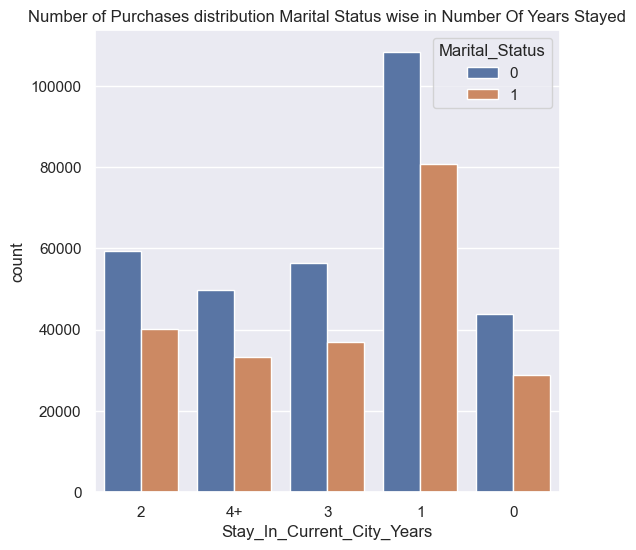

In [249]:
sns.countplot(data=df,x=df["Stay_In_Current_City_Years"],hue="Marital_Status")
plt.title("Number of Purchases distribution Marital Status wise in Number Of Years Stayed")
plt.show()

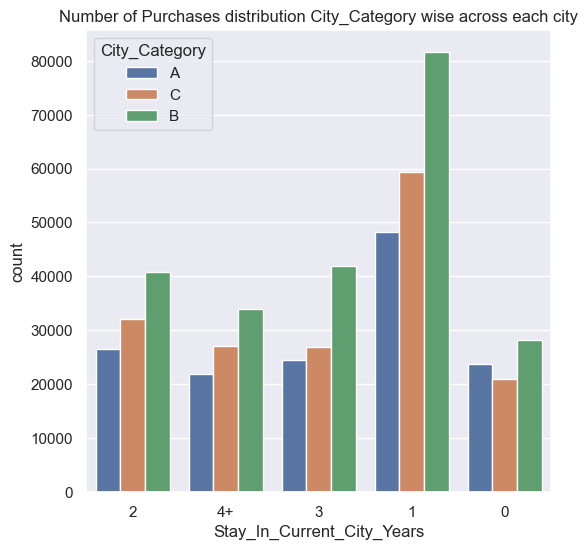

In [247]:
sns.countplot(data=df,x=df["Stay_In_Current_City_Years"],hue="City_Category")
plt.title("Number of Purchases distribution City_Category wise across each city")
plt.show()

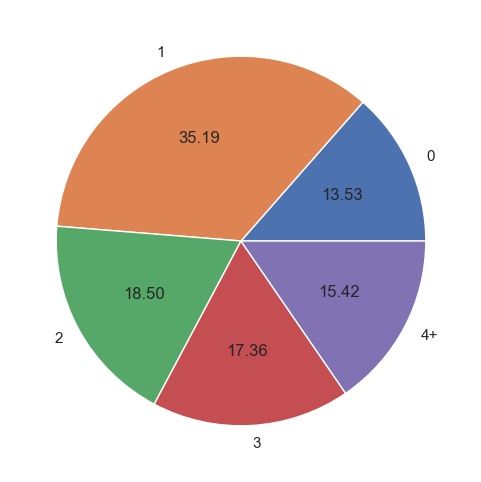

In [241]:
df.groupby("Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%0.2f")
plt.show()

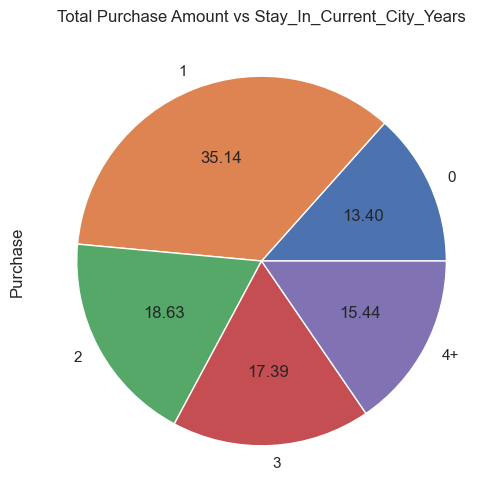

In [266]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind="pie",autopct="%0.2f")
plt.title("Total Purchase Amount vs Stay_In_Current_City_Years" )
plt.show()

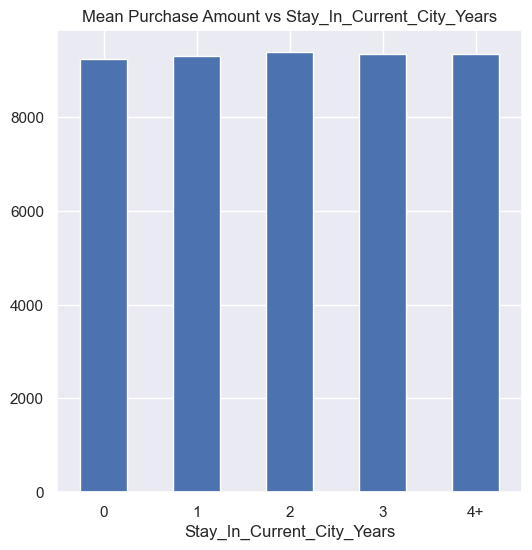

In [274]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind="bar")
plt.title("Mean Purchase Amount vs Stay_In_Current_City_Years" )
plt.xticks(rotation=360)
plt.show()

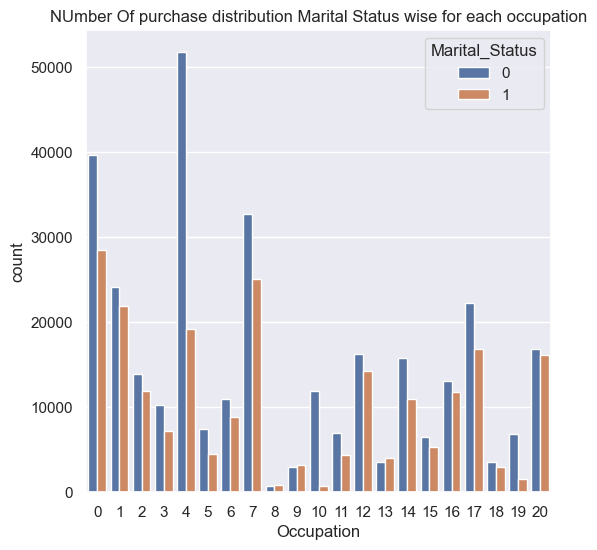

In [294]:
sns.countplot(x="Occupation",hue="Marital_Status",data=df)
plt.title("NUmber Of purchase distribution Marital Status wise for each occupation")
plt.show()

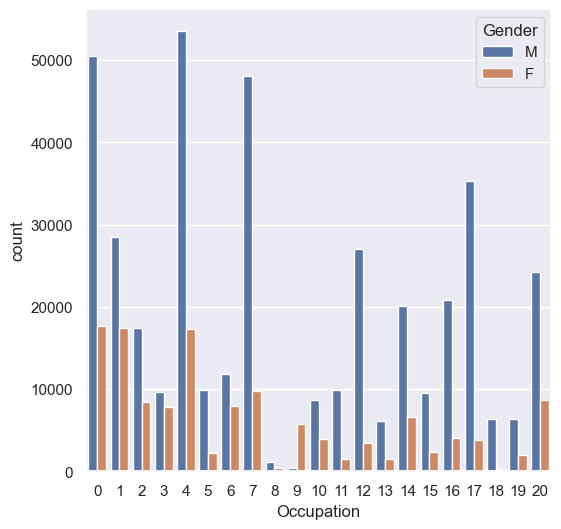

<Figure size 1500x1500 with 0 Axes>

In [289]:
sns.countplot(x="Occupation",hue="Gender",data=df)
plt.title("Number Of purchase distribution gender wise for each occupation")
plt.figure(figsize=(15,15))
plt.show()

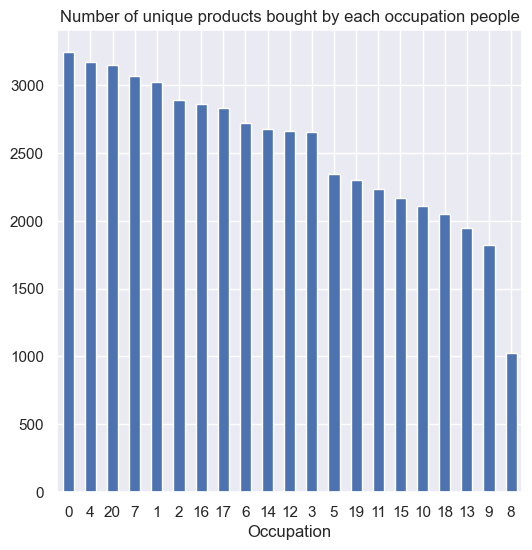

In [318]:
# Number of unique products bought by each occupation people
df.groupby("Occupation")["Product_ID"].nunique().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=360)
plt.title("Number of unique products bought by each occupation people")
plt.show()

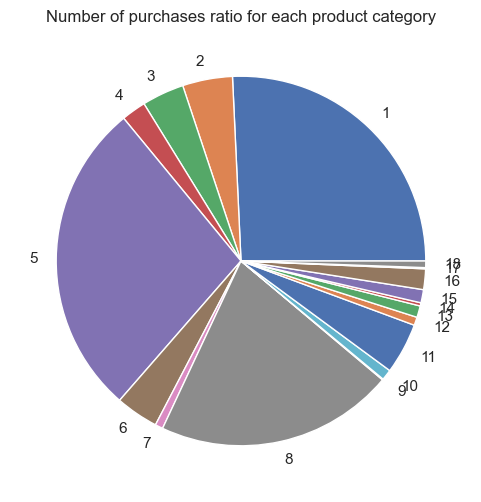

In [320]:
df.groupby("Product_Category").size().plot(kind="pie")
plt.title("Number of purchases ratio for each product category")
plt.show()

In [310]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


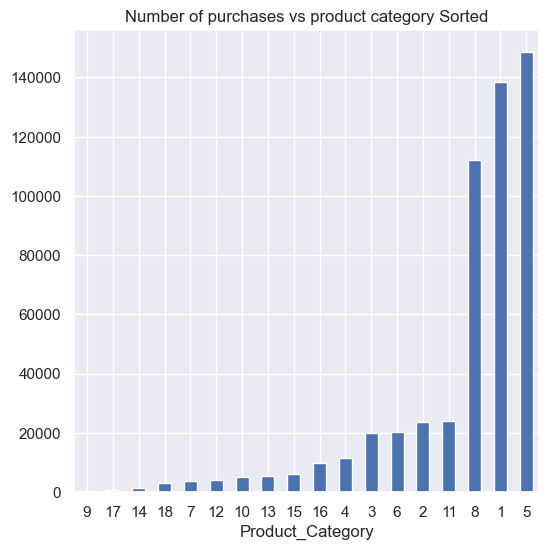

In [328]:
df.groupby("Product_Category").size().sort_values().plot(kind="bar")
plt.title("Number of purchases vs product category Sorted")
plt.xticks(rotation=360)
plt.show()

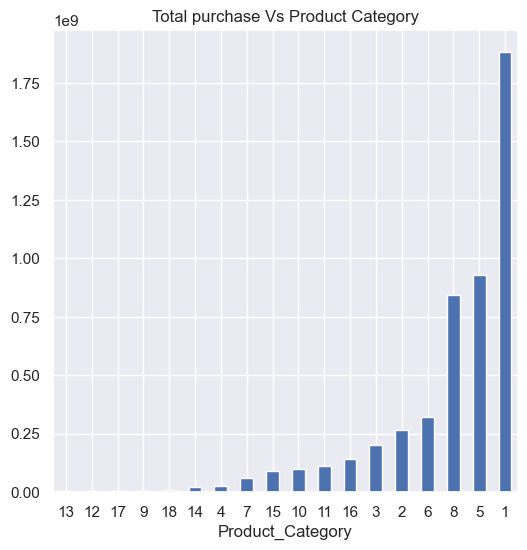

In [336]:
df.groupby("Product_Category")["Purchase"].sum().sort_values().plot(kind = "bar")
plt.title("Total purchase Vs Product Category")
plt.xticks(rotation=360)
plt.show()

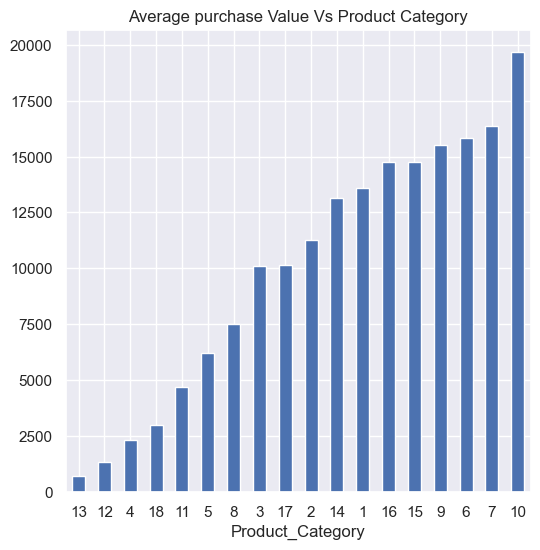

In [338]:
df.groupby("Product_Category")["Purchase"].mean().sort_values().plot(kind = "bar")
plt.title("Average purchase Value Vs Product Category")
plt.xticks(rotation=360)
plt.show()

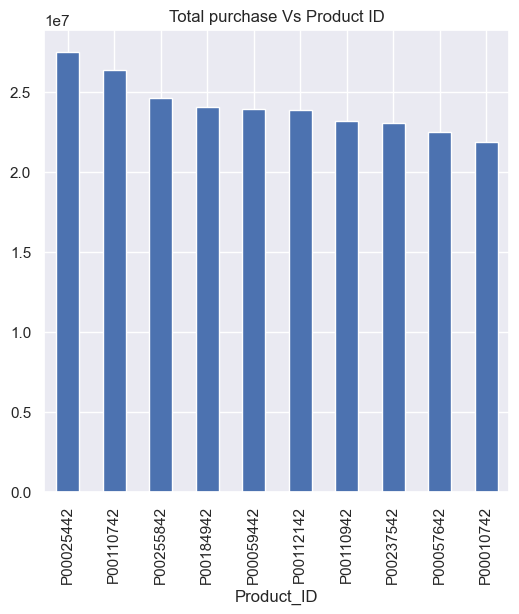

In [353]:
df.groupby("Product_ID")["Purchase"].sum().nlargest(10).sort_values(ascending=False).plot(kind = "bar")
plt.title("Total purchase Vs Product ID")
plt.show()

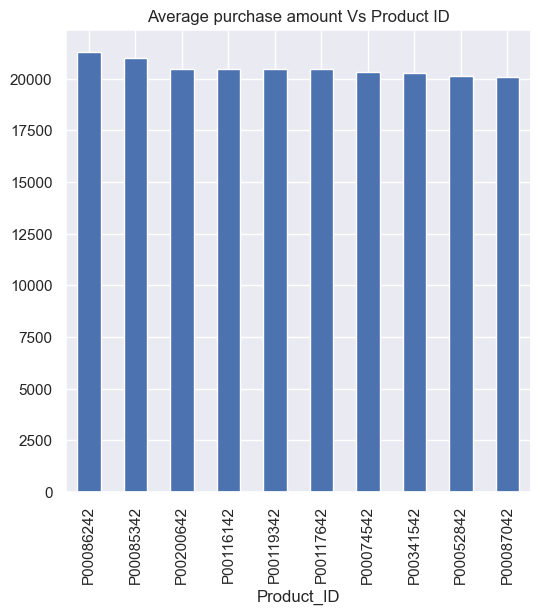

In [355]:
df.groupby("Product_ID")["Purchase"].mean().nlargest(10).sort_values(ascending=False).plot(kind = "bar")
plt.title("Average purchase amount Vs Product ID")
plt.show()

Text(0.5, 1.0, 'Gender wise distribution of Total Purchases across each Product Category')

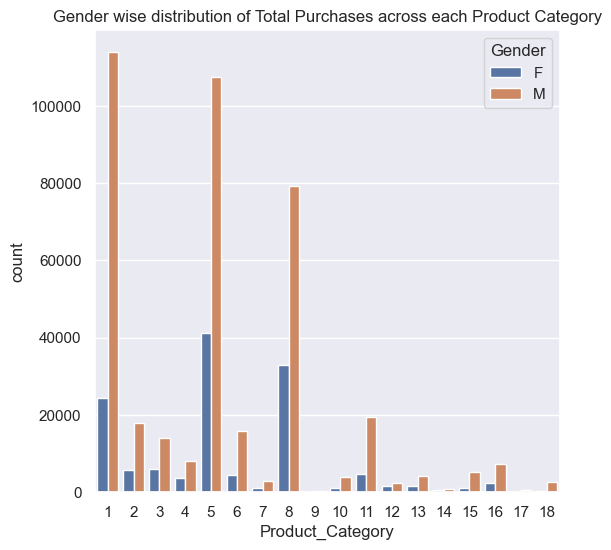

In [361]:
sns.countplot(data=df,x="Product_Category",hue = "Gender")
plt.title("Gender wise distribution of Total Purchases across each Product Category")

Text(0.5, 1.0, 'Marital Status wise distribution of Total Purchases across each Product Category')

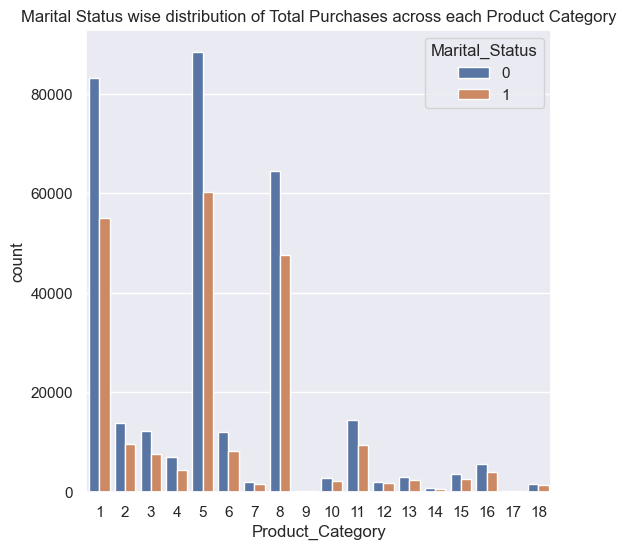

In [365]:
sns.countplot(data=df,x="Product_Category",hue = "Marital_Status")
plt.title("Marital Status wise distribution of Total Purchases across each Product Category")

## Combining Gender & Marital Status

In [369]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [371]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


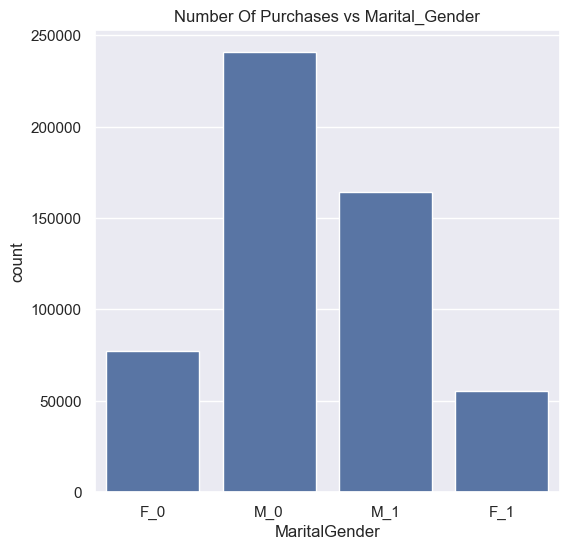

In [387]:
sns.countplot(x = df['MaritalGender'])
plt.title("Number Of Purchases vs Marital_Gender")
plt.show()

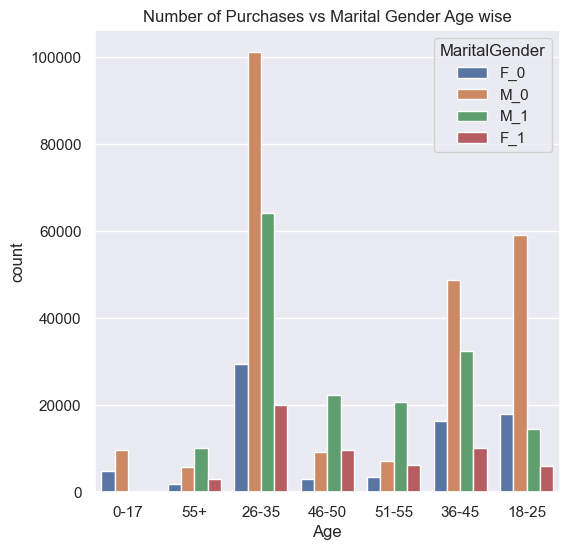

In [389]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])
plt.title("Number of Purchases vs Marital Gender Age wise")
plt.show()

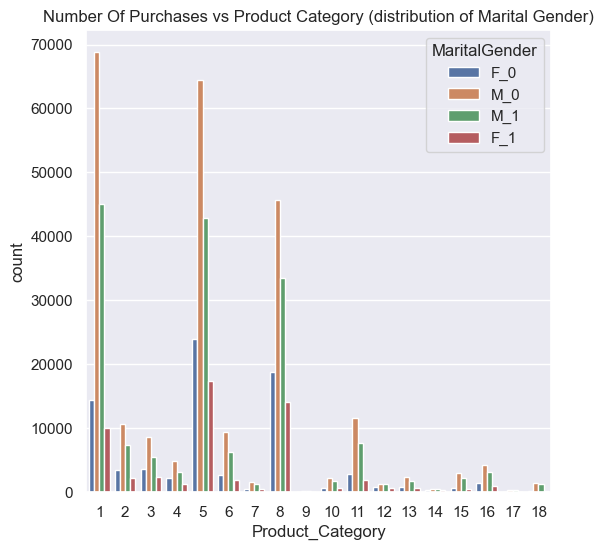

In [393]:
sns.countplot(x = df['Product_Category'], hue = df['MaritalGender'])
plt.title("Number Of Purchases vs Product Category (distribution of Marital Gender)")
plt.show()

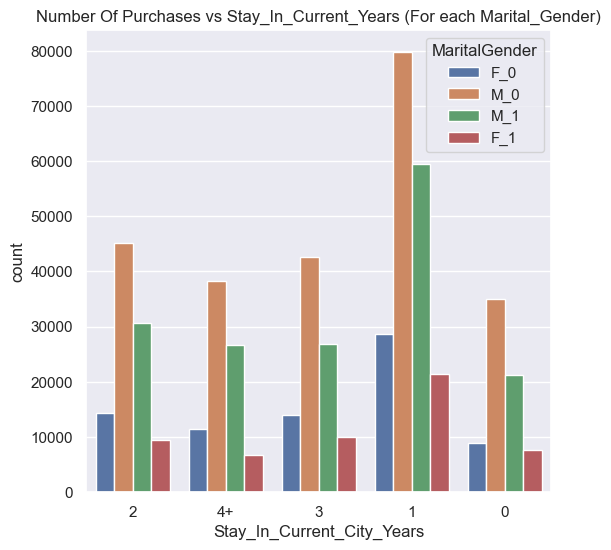

In [395]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])
plt.title("Number Of Purchases vs Stay_In_Current_Years (For each Marital_Gender)")
plt.show()

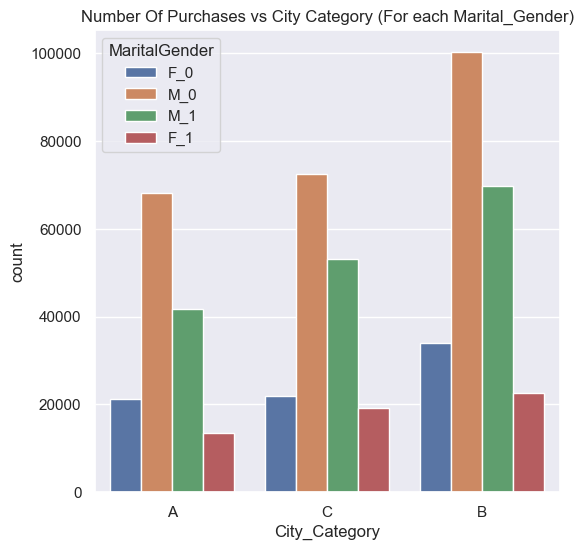

In [397]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])
plt.title("Number Of Purchases vs City Category (For each Marital_Gender)")
plt.show()